In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split


In [2]:
# data                                                            Shape

hyperberlinnn = loadmat('hyperberlinnn.mat')                      
ch_data = hyperberlinnn['InputImage1D']                     #(90000*114)
ch_result = hyperberlinnn['GroundTruthImage1D']             #(90000*1)
Tr_data = hyperberlinnn['Train']                            #(300*300)
Tr_result = hyperberlinnn['Train1D']                        #(90000*1)
groundTruth = hyperberlinnn['GroundTruth']

In [3]:
# Standardization
# Split into train (2/3) and test (1/3) sets

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

image1 = StandardScaler().fit_transform(ch_data)
image2 = StandardScaler().fit_transform(ch_result)
X_train, X_test, y_train, y_test = train_test_split(image1 , image2 , test_size = 0.30 , train_size = 0.70 , random_state = 42)
print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))



(62999, 114) (27000, 114) (62999, 1) (27000, 1)


In [4]:
# Correlation base Feature Selection

threshold = 0.0008

def Correlation_base_Feature_Selection(dataset, threshold):
    nBand = dataset.shape[1]
    
    corr = np.corrcoef(dataset.T) 
    diff = 1 - corr
    
    correlated= np.where(diff < threshold, 0, 1)
    np.fill_diagonal(correlated, 1)

    # select bands
    seleted_bands = np.arange(nBand)[correlated.all(axis=0)]
    
    return seleted_bands

selected_features = Correlation_base_Feature_Selection(X_train, threshold)


In [5]:
print(selected_features)

[  5   8   9  16  17  18  19  20  21  59  60  61  62  63 110 113]


In [6]:
# linear regression

model = LinearRegression().fit(X_train[:, selected_features], y_train)
pred_Ch = model.predict(X_test[:, selected_features])
pred_Tr = model.predict(X_train[:, selected_features])


In [7]:
# Evaluating the Algorithm


RMSE_Ch = sqrt(mean_squared_error(y_test,pred_Ch))                               #calculate RMSE
R2_Ch = r2_score(y_test,pred_Ch)                                                 #calculate R2
print('RMSE Check =', RMSE_Ch)
print('R2 Check =', R2_Ch)

RMSE_Tr = sqrt(mean_squared_error(y_train,pred_Tr))                               #calculate RMSE
R2_Tr = r2_score(y_train,pred_Tr)                                                 #calculate R2 
print('RMSE Train =', RMSE_Tr)
print('R2 Train =', R2_Tr)


RMSE Check = 0.527235604774936
R2 Check = 0.723089866336139
RMSE Train = 0.5287853068293276
R2 Train = 0.7199266828310975


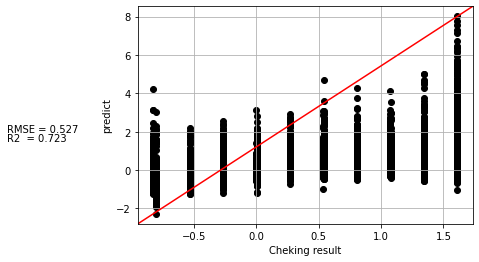

In [8]:
# Plot

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import metrics
import sklearn.metrics, math
from sklearn.metrics import r2_score


fig, ax = plt.subplots()
ax.scatter(y_test, pred_Ch , c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

R2_score=r2_score(y_test, pred_Ch)


plt.text(-2,2,'RMSE = {:.3f}'.format(RMSE_Ch))
plt.text(-2,1.5,'R2  = {:.3f}'.format(R2_Ch))
plt.ylabel("predict")
plt.xlabel("Cheking result")
plt.grid()
plt.show()

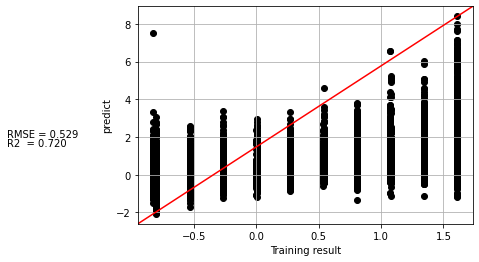

In [9]:
# Plot

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import metrics
import sklearn.metrics, math
from sklearn.metrics import r2_score


fig, ax = plt.subplots()
ax.scatter( y_train, pred_Tr , c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

R2_score=r2_score( y_train, pred_Tr )

plt.text(-2,2,'RMSE = {:.3f}'.format(RMSE_Tr))
plt.text(-2,1.5,'R2  = {:.3f}'.format(R2_Tr))
plt.ylabel("predict")
plt.xlabel("Training result")
plt.grid()
plt.show()